# Data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

zhfont1 = matplotlib.font_manager.FontProperties(fname='/Library/Fonts/Microsoft/mingliu_hkscs.ttf')

In [2]:
df = pd.read_csv('Ntu_Orders.csv')

In [3]:
columns = df.columns
print(columns)

Index(['SalesOrderSlaveId', 'DateId', 'MemberId', 'TradesOrderSlaveId',
       'ShopId', 'SalePageId', 'TradesOrderGroupCode', 'TrackSourceTypeDef',
       'TrackChannelTypeDef', 'TrackDeviceTypeDef', 'LevelOneCategoryName',
       'LevelTwoCategoryName', 'LevelThreeCategoryName',
       'LevelFourCategoryName', 'IsMajor', 'IsGift', 'Quantity', 'UnitPrice',
       'PromotionDiscount', 'EcouponDiscount', 'SalesOrderSlaveTotalPayment',
       'SalesOrderSlaveDateTime', 'SalesOrderSlaveStatusDef',
       'PayProfileTypeDef', 'ShippingProfileTypeDef', 'EcouponId',
       'IsSalePageGift'],
      dtype='object')


In [4]:
df['SalesOrderSlaveDateTime'][0]

'2017-01-03 23:11:47.207'

In [5]:
df['new_DateId'] = pd.to_datetime(df['DateId'].astype(str), format='%Y%m%d')

In [6]:
df['Month'] = df.new_DateId.astype(str).apply(lambda x: x[:7])

In [7]:
#new_df = df.groupby(by=['Month', 'LevelOneCategoryName', 'LevelTwoCategoryName'])[['SalesOrderSlaveTotalPayment','Quantity']].sum()

new_df = df.groupby(by=['Month', 'LevelTwoCategoryName', 'LevelThreeCategoryName'])[['SalesOrderSlaveTotalPayment','Quantity']].sum()

new_df

SalesOrderSlaveTotalPayment  \
Month   LevelTwoCategoryName LevelThreeCategoryName                                
2017-01 內衣                   內褲                                          61471.0   
                             款式搜尋                                        91963.0   
                             隱形胸罩、胸墊                                       582.0   
        女裝                   上衣                                       10292840.0   
                             下著                                        3791947.0   
                             其他                                          46545.0   
                             圍巾/披肩/襪品                                   370753.0   
                             外套                                         870701.0   
        指甲油、刷具、美材            美妝小物                                         3222.0   
        收納                   包包、小物收納、抽屜隔板                                 2530.0   
        時尚女包                 女性其他包款                                       4276.0   
                             女性後背包                                        6832.0   
        智慧型手機配件              其它品牌區                                         179.0   
        比基尼、泳裝、配件            比基尼、泳裝                                       2249.0   
        流行女鞋                 其他女鞋                                        29063.0   
                             拖鞋                                           6915.0   
                             涼鞋                                          23902.0   
                             靴子                                          17827.0   
        飾品、配件                帽子                                          71368.0   
                             平光眼鏡                                          723.0   
                             戒指                                           2553.0   
                             手鍊/手環                                         370.0   
                             耳環                                          23155.0   
                             項鍊                                          17802.0   
                             髮飾                                           2595.0   
2017-02 內衣                   內褲                                          74989.0   
                             款式搜尋                                       247801.0   
                             隱形胸罩、胸墊                                      6434.0   
        女裝                   上衣                                       14379881.0   
                             下著                                        7430740.0   
...                                                                          ...   
2017-12 時尚女包                 女性側背包                                       18147.0   
                             女性其他包款                                       5114.0   
                             女性手提包                                       25394.0   
        流行女鞋                 其他女鞋                                       303664.0   
                             拖鞋                                          31739.0   
                             涼鞋                                           4095.0   
                             靴子                                         323193.0   
        飾品、配件                女用皮帶                                        15716.0   
                             帽子                                         442481.0   
                             平光眼鏡                                        11860.0   
                             戒指                                            714.0   
                             耳環                                           5385.0   
                             項鍊                                           5029.0   
                             髮飾                                            657.0   
2018-01 內衣                   內褲                                          21476.0   
                     

In [8]:
name_of_array = list()
array_ = list()
for i in range(len(new_df)):
    ele = new_df.iloc[i]
    if ele.name[1] not in name_of_array:
        name_of_array.append(ele.name[1]+ele.name[2])
        array_.append(np.zeros(12))
    index = name_of_array.index(ele.name[1]+ele.name[2])
    array_[index][int(ele.name[0][-2:])-1] = ele.SalesOrderSlaveTotalPayment

array_ = np.array(array_)

### 用'LevelTwoCategoryName', 'LevelThreeCategoryName'來作為每月分類

In [9]:
print(name_of_array)
print("size of name_of_array is %d" % len(name_of_array))
print("size of array_ is %d, %d" % (len(array_), array_[0].shape[0]))

['內衣內褲', '內衣款式搜尋', '內衣隱形胸罩、胸墊', '女裝上衣', '女裝下著', '女裝其他', '女裝圍巾/披肩/襪品', '女裝外套', '指甲油、刷具、美材美妝小物', '收納包包、小物收納、抽屜隔板', '時尚女包女性其他包款', '時尚女包女性後背包', '智慧型手機配件其它品牌區', '比基尼、泳裝、配件比基尼、泳裝', '流行女鞋其他女鞋', '流行女鞋拖鞋', '流行女鞋涼鞋', '流行女鞋靴子', '飾品、配件帽子', '飾品、配件平光眼鏡', '飾品、配件戒指', '飾品、配件手鍊/手環', '飾品、配件耳環', '飾品、配件項鍊', '飾品、配件髮飾', '內衣內褲', '內衣款式搜尋', '內衣隱形胸罩、胸墊', '女裝上衣', '女裝下著', '女裝其他', '女裝圍巾/披肩/襪品', '女裝外套', '指甲油、刷具、美材美妝小物', '時尚女包女性其他包款', '智慧型手機配件其它品牌區', '比基尼、泳裝、配件比基尼、泳裝', '流行女鞋其他女鞋', '流行女鞋拖鞋', '流行女鞋涼鞋', '流行女鞋靴子', '飾品、配件帽子', '飾品、配件平光眼鏡', '飾品、配件戒指', '飾品、配件手鍊/手環', '飾品、配件耳環', '飾品、配件項鍊', '內衣內褲', '內衣款式搜尋', '內衣隱形胸罩、胸墊', '女裝上衣', '女裝下著', '女裝其他', '女裝圍巾/披肩/襪品', '女裝外套', '指甲油、刷具、美材美妝小物', '收納包包、小物收納、抽屜隔板', '時尚女包女性其他包款', '時尚女包女性後背包', '時尚女包女性手拿包', '時尚女包零錢包', '智慧型手機配件其它品牌區', '比基尼、泳裝、配件比基尼、泳裝', '流行女鞋其他女鞋', '流行女鞋拖鞋', '流行女鞋涼鞋', '流行女鞋靴子', '飾品、配件帽子', '飾品、配件平光眼鏡', '飾品、配件戒指', '飾品、配件手鍊/手環', '飾品、配件耳環', '飾品、配件項鍊', '飾品、配件髮飾', '內衣內褲', '內衣款式搜尋', '內衣隱形胸罩、胸墊', '女裝上衣', '女裝下著', '女裝其他', '女裝圍巾/披肩/襪品', '女裝外套', '指甲油、刷具、美材美妝小物', '收納內衣褲、小衣物收納', '收納包包、小物收納、抽屜隔

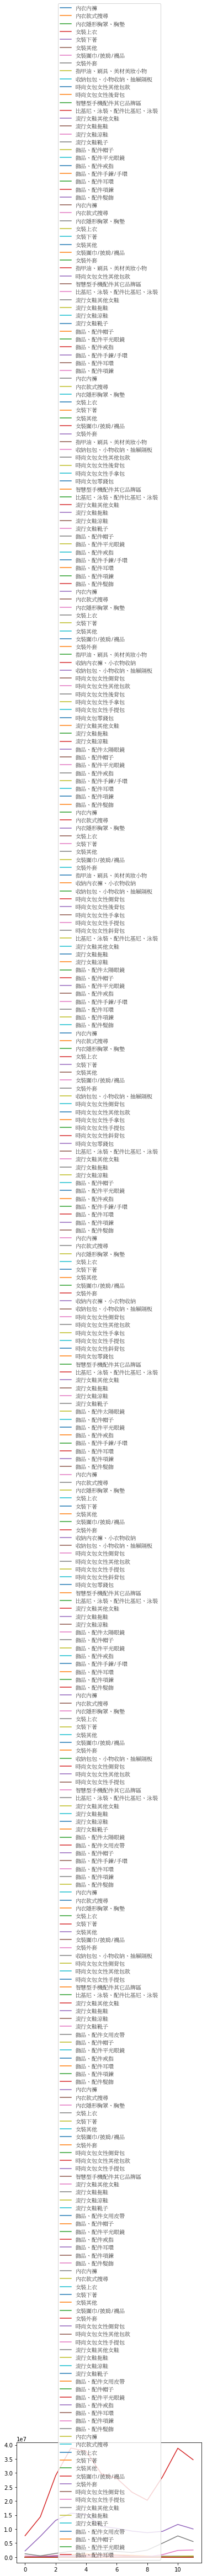

In [10]:
plt.figure()
for i in range(len(name_of_array)):
    plt.plot(array_[i], label=name_of_array[i])
plt.legend(prop=zhfont1)
plt.show()

## 爬蟲

In [11]:
import requests
from bs4 import BeautifulSoup
import json
HTML_PARSER = "html.parser"


In [12]:
def find_first_n_page(month, page, array_, first_n):
    OutputData = pd.DataFrame(columns=['name','price'])

    pd_array = pd.DataFrame(array_).T
    pd_array = pd_array.iloc[month-1].nlargest(first_n)
    first_index = pd_array.index
    n = 0 
    for com_index in first_index:
        name = name_of_array[com_index]
        print("the most popular commodity is %s" % name)
        print("Sales Order Slave Total Payment is %d" % array_[com_index, month-1])
        for i in range(page):
            url = "https://ecshweb.pchome.com.tw/search/v3.3/all/results?q="+ name +"&page="+str(i)+"&sort=rnk/dc"
            list_req = requests.get(url)
            data = json.loads(list_req.text)
            for info in (data['prods']):
                OutputData.loc[n] = [info['describe'], info['originPrice']]
                n += 1

    return OutputData

# 輸入月份，會爬過去記錄最高的10項商品

In [13]:
# find_first_n_page(month, search_n_page_per_commodity, data, first_n_element)
# month : 月份
# search_n_page_per_commodity : 每個產品找多少頁
# data : 之前作好的資料
# first_n_element : 要找多少個最受歡迎的產品
OutputData = find_first_n_page(1, 2, array_,3)
OutputData

the most popular commodity is 女裝上衣
Sales Order Slave Total Payment is 7654134
the most popular commodity is 女裝下著
Sales Order Slave Total Payment is 2239158
the most popular commodity is 女裝外套
Sales Order Slave Total Payment is 1214651


,name,price
0,ZOBOO-蕾絲衫上衣寬鬆女裝長袖中長款雪紡襯衫-OB807,490.0
1,【菟絲花】大尺碼-11037韓版加大碼女裝顯瘦碎花小衫上衣（藍色4XL）,2080.0
2,ZOBOO-蕾絲衫上衣寬鬆女裝長袖中長款雪紡襯衫-OB806,490.0
3,【lingling中大尺碼】花朵寬接紗袖長版上衣洋裝(優雅黑),999.0
4,【lingling】壓直條連帽抽繩長上衣洋裝(好感黑),799.0
5,GIORDANO 女裝棉質中長款半開襟襯衫造型上衣-66 淺藍/白條紋,720.0
6,【lingling】壓直條連帽抽繩長上衣洋裝(舒適白),799.0
7,GIORDANO 女裝棉質中長款半開襟襯衫造型上衣-01 皓雪,720.0
8,GIORDANO 女裝棉質中長款半開襟襯衫造型上衣-06 粉色,720.0
9,★原$1789↘下殺★89zone 修身性感小香風雪紡衫,499.0
